# 1.1. Описание проекта 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. \
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.\
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. \
Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.\
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# 1.2. Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

# 1.3. План выполнения

1. Подготовить данные;
2. Произвести анализ данных (посмотреть корреляцию переменных);
3. Составить портрета пользователя каждого региона (самые популярные платформы, жанры, как влияет рейтинг ESRB на продажи в отдельном регионе;
4. Проверить гипотезы 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
5. Сделать общий вывод

# 2. Подготовка данных

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [151]:
df = pd.read_csv('games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [152]:
df.columns = [x.lower() for x in df.columns]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [153]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Всего в базе 16715 игр. При этом:
- в двух строках нет названия игры (и жанра).
- в 269 играх нет года релиза.
- поля Critic_Score, User_Score, Rating имеют различную полноту заполнения, около 50%-60% строк

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [155]:
print(df.user_score.unique())
print('\n')
print(df.critic_score.unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


In [156]:
# заполнение пропусков
df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')
df['year_of_release'] = df['year_of_release'].fillna(1950)
df['critic_score'] = df['critic_score'].fillna(-2)
df['rating'] = df['rating'].fillna('Unknown')
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1
df['user_score'] = df['user_score'].fillna(-2)

#
В строках, не содержащих название игры и жанра, пустые значения заменили на строку 'Unknown'.\
В столбце User_Score встречается значение tbd (to be defined). Такое значение заменили на -1.\
Пустые значения в User_score и Critic_Score заменены на -2, для отличия.\
В столбце Rating пустые значения заменили на 'Unknown'. \
В столбце Year_of_Release пустые значения заменены 1950 годом - для отличия, чтобы не терять данные, т.к. в 1950 игр для приставок не было.

In [157]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-2.0,-2,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-2.0,-2,Unknown


In [158]:
# Изменение типов данных, где необходимо (т.к. данные - целые числа в critic_score & year_of_release)
df['critic_score'] = df['critic_score'].astype('int')
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float64')

In [159]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB
None
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating          

In [160]:
# добавим столбец с общими продажами
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [161]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2,-2.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2,-2.0,Unknown,31.38


# 3. EDA - Анализ данных

Text(0.5, 1.0, 'total sales of games by year')

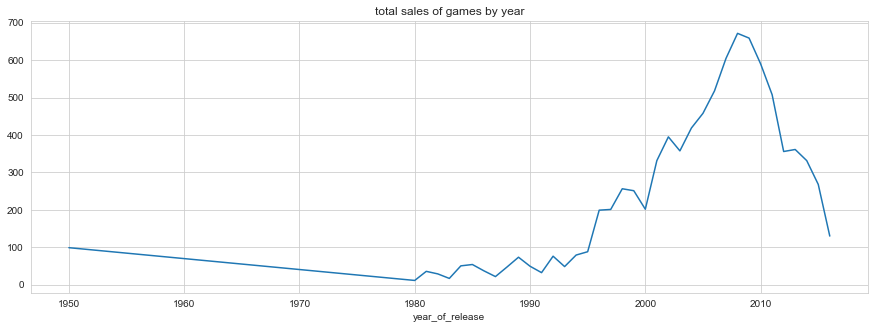

In [165]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df.groupby('year_of_release')['total_sales'].sum().plot()
plt.title('total sales of games by year')

Text(0.5, 1.0, 'games count by year')

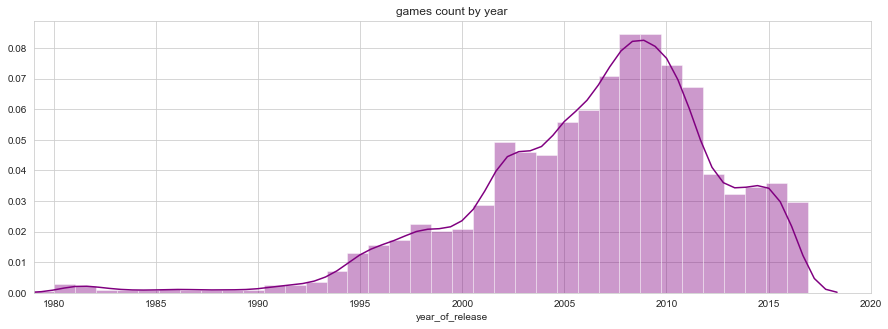

In [118]:
plt.figure(figsize=(15,5))
ax = sns.distplot(df['year_of_release'], hist_kws={"range": [1979,2020]}, bins=40, color = 'purple', )
ax.set_xlim([1979,2020])
plt.title('games count by year')

# 
Посмотрим, как менялись продажи по платформам. \
Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Посмотрим, за какой характерный срок появляются новые и исчезают старые платформы.\
Возьмем данные за соответствующий актуальный период (возьмем 2011 год). 

In [119]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Top platform sales')

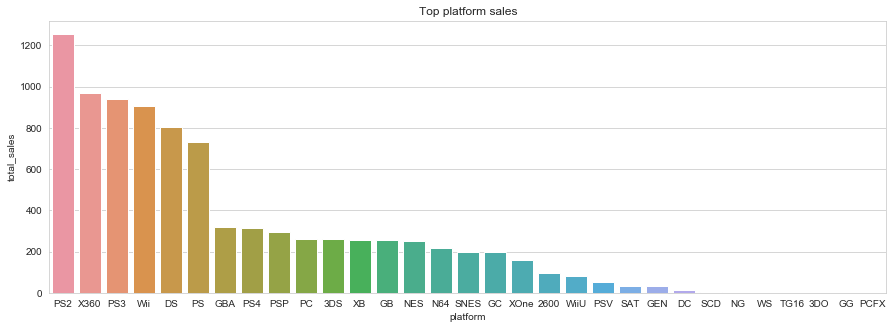

In [120]:
plt.figure(figsize=(15,5))
platform_sales = df.pivot_table('total_sales', index='platform', aggfunc='sum').sort_values('total_sales', ascending=False)
sns.barplot(platform_sales.index,platform_sales.total_sales)
plt.title('Top platform sales')

In [121]:
top_platforms = ['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC','3DS','XB','GB','NES','N64','SNES','GC','XOne']

In [122]:
platform_by_year = df.groupby(['year_of_release','platform']).sum()


In [123]:
platform_pivot = platform_by_year.pivot_table(index=['year_of_release'], columns='platform', values = 'total_sales', aggfunc='sum')

In [124]:
platform_pivot = platform_pivot[top_platforms]

Text(0.5, 1.0, 'total platform sales per year')

<Figure size 1440x2160 with 0 Axes>

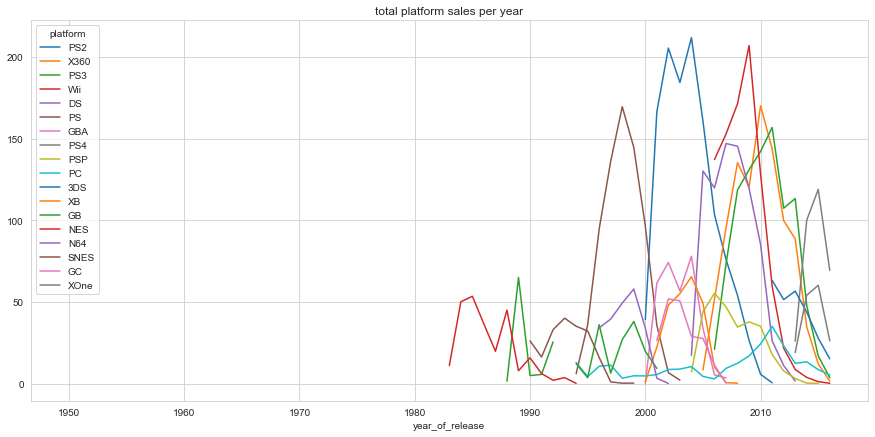

In [125]:
plt.figure(figsize=(20,30))
platform_pivot.plot(figsize=(15,7))
plt.title('total platform sales per year')

Посмотрим, какие платформы лидируют по продажам, какие растут, а какие - падают. Постараемся разобраться, какие платформы являются потенциально прибыльными.  



In [126]:
top5 = ['PS2','X360','PS3','Wii','DS']
print(top5)

['PS2', 'X360', 'PS3', 'Wii', 'DS']


Text(0.5, 1.0, 'top5 platform sales per year')

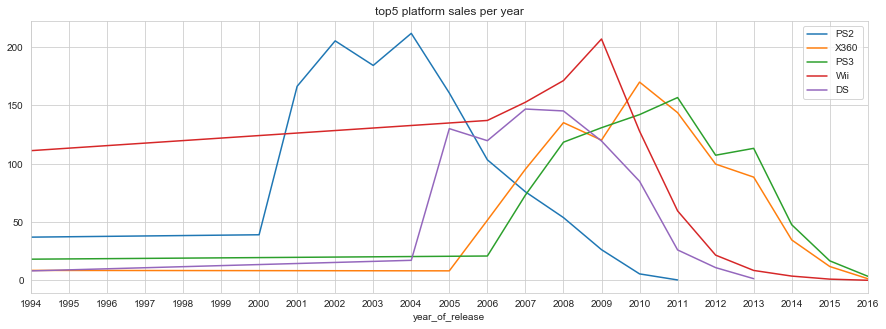

In [127]:
platform_pivot2 = platform_pivot[top5]
plt.figure(figsize=(15,5))
plt.xticks(range(1994, 2017))
sns.lineplot(data=platform_pivot2, dashes=False)
plt.xlim(1994, 2016)
plt.title('top5 platform sales per year')

Исходя из этого графика, мы можем сделать вывод, что наиболее успешными являются платформы компаний Nintendo и Sony (Япония).\
Жизненный цикл платформ, входящих в топ-5 составляет приблизительно 10 лет, при этом, например, компания Sony (PS2, PS3) достигала пик продаж примерно на 5-6 год существования, а затем появлялась обновленная версия консоли. \
Xbox 360 довольно сильно похож по поведению графика на PS3: эти платформы являлись основными конкурентами друг друга длительное время. Однако, следует отметить, что XBox имеет все же незначительно чуть лучшие продажи.

In [128]:
platform_life = df.groupby('platform').agg({'year_of_release': lambda x: x.nunique()}).sort_values('year_of_release', ascending=False)
platform_life.head()


,year_of_release
platform,
PC,27
GB,14
X360,13
PSP,13
PS2,13


Text(0.5, 1.0, 'platform lifetime')

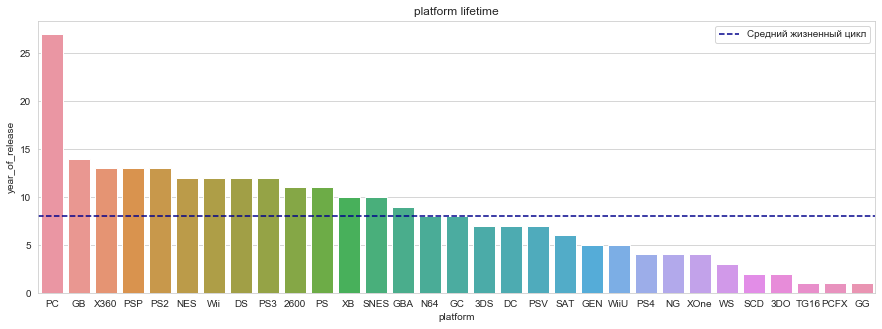

In [129]:
plt.figure(figsize=(15,5))
sns.barplot(x=platform_life.index, y=platform_life.year_of_release)
plt.axhline(platform_life.year_of_release.median(), color='darkblue', ls='--', label='Средний жизненный цикл')
plt.legend()
plt.title('platform lifetime')

Как видно из графика, самый долгий жизненный цикл у платформы - у компьютера (PC). \
Также, медианный жизненный цикл поддержки консоли составляет ~ 7 лет. 

Итак, мы посмотрели на продажи топовых платформенных консолей по годам (PS2,XBox360,PS3,Wii,DF), взглянем теперь на полную картину продаж всех консолей.

Text(0.5, 1.0, 'total platform sales per year')

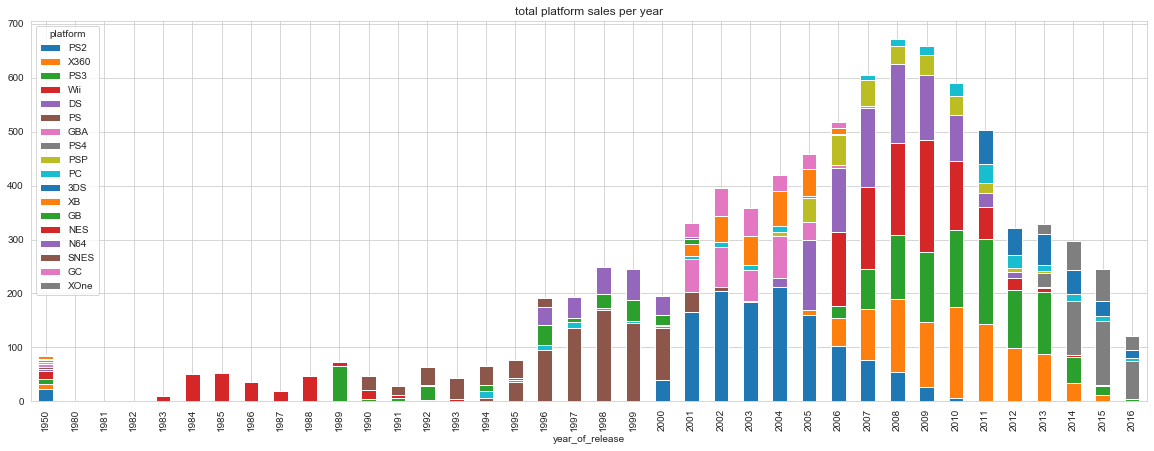

In [130]:
platform_pivot.plot(kind='bar', stacked=True, figsize=(20,7))
plt.title('total platform sales per year')

# 
Как мы можем заметить из графиков, больше всего игр было выпущено во второй половине 2000 (стремительный рост начался с 2005-2006г).\
До 1995 года, количество выпускаемых игр было незначительным. \
Как мы обнаружили из предыдущего графика, платформенные консоли живут до 10 лет (кроме ПК), с пиком продаж в середине жизненного цикла.
Также можно заметить, что примерно с 2012 года количество выпускаемых игр более-менее стабилизировалось.

Жизненный цикл всех текущих платформ подходит к концу, поэтому данные по продажам игр неактуальных платформ учитывать при инвестировании не стоит.\
Самая популярная платформа за всю историю - PS2, а в последние годы лидируют PS4, XOne, 3DS, PC. Именно эти платформы, теоретически, могут принести наибольшие продажи, однако, если посмотреть на график, расположенный выше, мы можем увидеть, что все платформы на данный момент имеют нисходящий тренд. 

In [131]:
df[df['year_of_release']==2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

In [132]:
games_actual = df[df['year_of_release'] >=2011]
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-2,-2.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-2,-2.0,Unknown,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-2,-2.0,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-2,-2.0,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-2,-2.0,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-2,-2.0,Unknown,0.01


(0, 5)

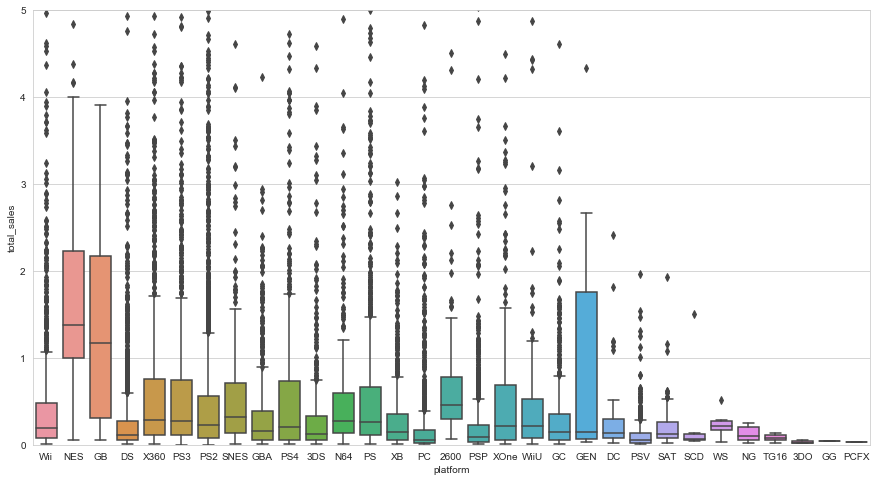

In [133]:
# Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(x=df['platform'],y=df['total_sales'])
boxplot.set_ylim(0, 5)

# 
Иcходя из диаграммы размаха, мы можем заметить, что продажи отдельных игр могут сильно отличаться от средних по платформе - видим множество выбросов.\
Что касается медианных продаж игр, то в зависимости от платформы они меняются значительно меньше - это можно объяснить тем, что скорее всего имеются хиты среди игр, которые обеспечивают многомиллионные продажи и множество обычных не очень популярных игр.

In [134]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-2,-2.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-2,-2.0,Unknown,31.38


# 
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.\
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. \
Также, посмотрим на общее распределение игр по жанрам. 

In [135]:
ps2_user_score = df[(df['platform']=='PS2') & (df['user_score']>=0)]
ps2_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16050,Just Cause,PS2,2006,Action,0.01,0.01,0.00,0.00,67,7.9,M,0.02
16152,Alfa Romeo Racing Italiano,PS2,2005,Racing,0.01,0.01,0.00,0.00,-2,6.8,E,0.02
16287,Metal Slug Anthology,PS2,2007,Shooter,0.00,0.00,0.01,0.00,80,8.1,T,0.01
16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006,Shooter,0.01,0.00,0.00,0.00,70,9.2,E10+,0.01


Text(0.5, 1.0, 'PS2 total sales VS user score')

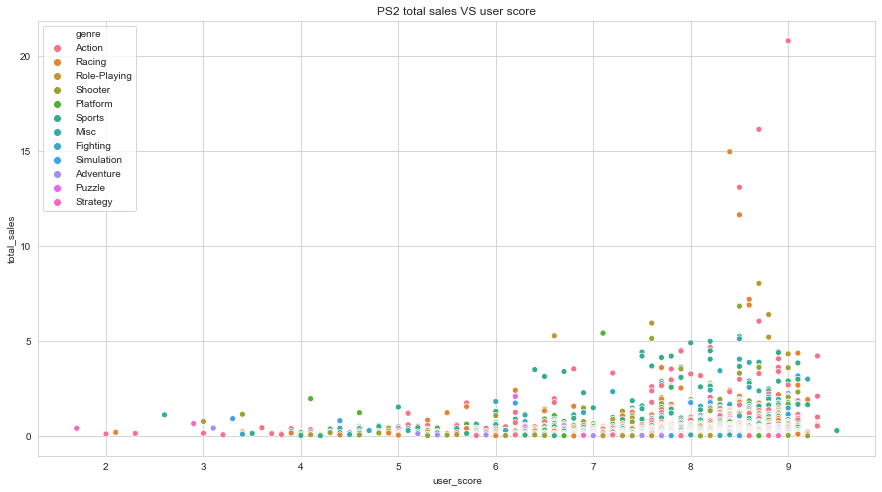

In [136]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.scatterplot(x=ps2_user_score['user_score'],y=ps2_user_score['total_sales'], hue=ps2_user_score['genre'])
plt.title('PS2 total sales VS user score')

In [137]:
ps2_critic_score = df[(df['platform']=='PS2') & (df['critic_score']>=0)]
ps2_critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16287,Metal Slug Anthology,PS2,2007,Shooter,0.00,0.00,0.01,0.00,80,8.1,T,0.01
16429,Greg Hastings' Tournament Paintball Max'd,PS2,2006,Shooter,0.01,0.00,0.00,0.00,70,9.2,E10+,0.01
16439,Ultimate Board Game Collection,PS2,2006,Misc,0.01,0.00,0.00,0.00,37,-1.0,E,0.01
16507,World Heroes Anthology,PS2,2007,Fighting,0.00,0.00,0.01,0.00,53,-1.0,T,0.01


Text(0.5, 1.0, 'PS2 total sales VS critic score')

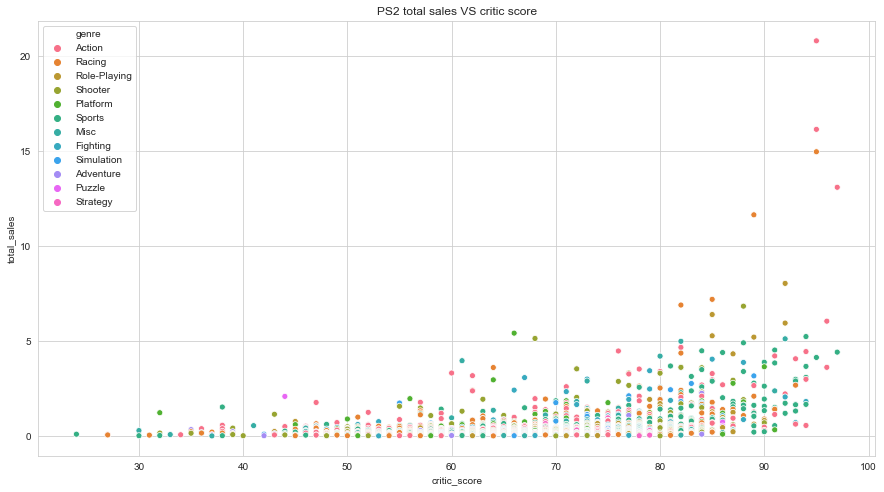

In [138]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=ps2_critic_score['critic_score'],y=ps2_critic_score['total_sales'],hue=ps2_critic_score['genre'])
plt.title('PS2 total sales VS critic score')

In [139]:
print('Корреляция между пользовательским рейтингом и продажами: ')
print(ps2_user_score['user_score'].corr(df['total_sales']))
print('\n')
print('Корреляция между рейтингом критиков и продажами: ')
print(ps2_critic_score['critic_score'].corr(df['total_sales']))

Корреляция между пользовательским рейтингом и продажами: 
0.17286551112058182


Корреляция между рейтингом критиков и продажами: 
0.3954345494545488


              total_sales
genre                    
Action            1744.17
Sports            1331.27
Shooter           1052.45
Role-Playing       934.56
Platform           827.77
Misc               802.51
Racing             728.67
Fighting           447.53
Simulation         389.97
Puzzle             242.57
Adventure          237.59
Strategy           174.23
Unknown              2.42


Text(0.5, 1.0, 'total Sales per Genre')

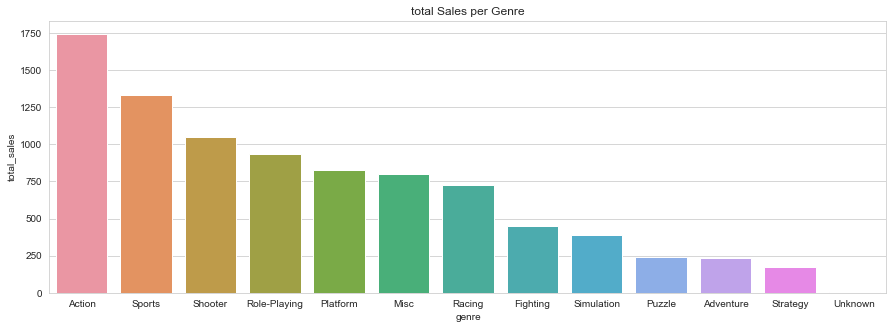

In [140]:
genre_sales = pd.DataFrame(df.groupby('genre')['total_sales'].sum().sort_values(ascending=False))
print(genre_sales)
plt.figure(figsize=(15,5))
sns.barplot(x=genre_sales.index, y=genre_sales.total_sales)
plt.title('total Sales per Genre')

Исходя из данных о продажах игр на cамой популярной платформе (PS2), продажи имеют слабую положительную корреляцию с пользовательскими отзывами (~17%), и среднюю положительную (~40%) - с отзывами критиков.\
При этом, довольно интересно, что самые успешные в плане продаж игры не всегда имеют самый высокий рейтинг отзывов.
Такую относительно невысокую корреляцию мы можем объяснить слишком большим разбросом продаж игр на платформах.\

Также, продажи игр имеют прямую зависимость от жанра: как следует из графика, самыми прибыльными играми считаются игры жанра Action и Sports, а наименее прибыльные - Fighting, Simulation, Puzzle, Adventure, Strategy.

# 4. Составление портрета пользователя

Составим портрет пользователя каждого региона\
Определим для пользователя каждого региона (NA, EU, JP):\
    - Самые популярные платформы (топ-5); 
    - Самые популярные жанры (топ-5); 
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе

Regions sales by platforms: 


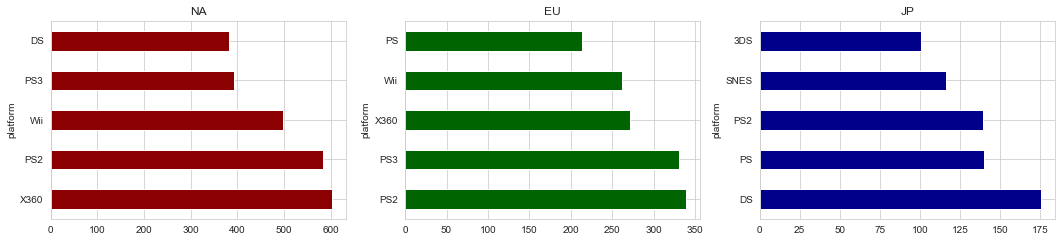

In [141]:
print('Regions sales by platforms: ')
fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,3),(0,0))
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='NA',color='darkred')
ax1 = plt.subplot2grid((2,3),(0,1))
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='EU', color='darkgreen')
ax1 = plt.subplot2grid((2,3),(0,2))
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='JP',color='darkblue')

Regions sales by genres:


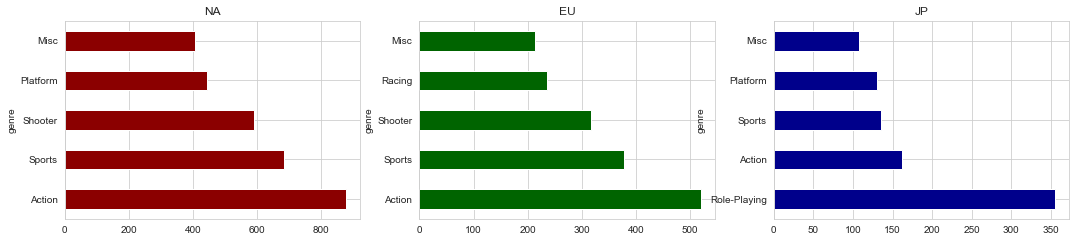

In [142]:
print('Regions sales by genres:')
fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,3),(0,0))
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='NA', color='darkred')
ax1 = plt.subplot2grid((2,3),(0,1))
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='EU',color='darkgreen')
ax1 = plt.subplot2grid((2,3),(0,2))
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='JP', color='darkblue')

Regions sales by rating:


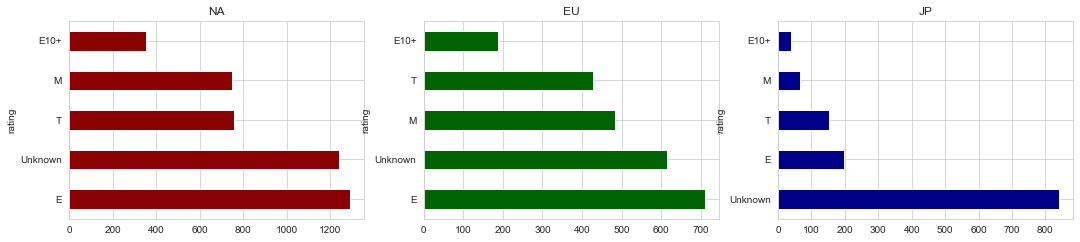

In [143]:
print('Regions sales by rating:')
fig = plt.figure(figsize=(18,8) )
ax1 = plt.subplot2grid((2,3),(0,0))
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='NA',color='darkred')
ax1 = plt.subplot2grid((2,3),(0,1))
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='EU',color='darkgreen')
ax1 = plt.subplot2grid((2,3),(0,2))
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='barh',title='JP',color='darkblue')

#
Проанализируем наши графики. \
Как можно заметить, состав и соотношение Топ-5 жанров в Северной Америке(na) и Европе(eu) практически совпадают (кроме 4го места - Platform в Сев.Америке, Racing - в Европе), но различаются с Японией. \
Первые места в EU и NA у Action и Sports, а в Японии их существенно опередили - 1ое место у RPG-игр, с общей долей ~40%.\

Состав и соотношение Топ-5 платформ в разных регионах разное:
- X360 отсутствует в Японии, где все первые места занимают платформы японских производителей - Sony и Nintendo.
- X360 (разработки американской компании Microsoft) на 1ом месте в Северной Америке (что не удивительно).
- В Европе первое место по платформам занимает PS2.

Состав и соотношение игр по рейтингу в Северной Америке и Европе очень похоже и сильно отличается от Японии.\
В Японии игры без возрастной категории там занимают 60% рынка - в 3 раза больше, чем в EU и NA. \
А игры для взрослых занимают 10% (37% в EU и NA). \
Это скорее связано с предпочтением пользователей по жанрам: в EU и NA намного популярнее Action и Shooter.

# 5.Проверка гипотез 

Выдвинем и проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
- Средние пользовательские рейтинги жанров Action и Sports одинаковые.\

In [145]:
from scipy import stats as st
XOne = df[(df['platform']=='XOne') & (df['user_score']>=0)]['user_score']
PC = df[(df['platform']=='PC') & (df['user_score']>=0)]['user_score']
XOne_mean = XOne.mean()
PC_mean = PC.mean()
print('Средний пользовательский рейтинг Xbox One:',XOne_mean)
print('Средний пользовательский рейтинг PC:',PC_mean)

Средний пользовательский рейтинг Xbox One: 6.52142857142857
Средний пользовательский рейтинг PC: 7.062467532467546


In [146]:
print('H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('\n')
alpha=0.05
results = st.ttest_ind(XOne, PC)
print('p-значение:',results.pvalue)

if results.pvalue<alpha:
    print('Отклоняем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC - средние пользовательские рейтинги разные')
else:
    print('Нет оснований отклонять нулевую гипотезу - средние пользовательские рейтинги платформ Xbox One и PC могут быть одинаковыми')

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


p-значение: 1.3896435533548819e-05
Отклоняем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC - средние пользовательские рейтинги разные


In [147]:
Action = df[(df['genre']=='Action') & (df['user_score']>=0)]['user_score']
Sports = df[(df['genre']=='Sports') & (df['user_score']>=0)]['user_score']
Action_mean = Action.mean()
Sports_mean = Sports.mean()
print('Средний пользовательский рейтинг жанра Action:', Action_mean)
print('Средний пользовательский рейтинг жанра Sports:', Sports_mean)

Средний пользовательский рейтинг жанра Action: 7.054043715846988
Средний пользовательский рейтинг жанра Sports: 6.961196736174073


In [148]:
print('H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые')
print('\n')
alpha = 0.05
results = st.ttest_ind(Action, Sports)
print('p-значение: ', results.pvalue)

if results.pvalue<alpha:
    print('Отклоняем нулевую гипотезу - Средние пользовательские рейтинги жанров Action и Sports - разные')
else: 
    print('Нет оснований отклонять нулевую гипотезу - Средние пользовательские рейтинги жанров Action и Sports могут быть одинаковые')

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые


p-значение:  0.10406951359049141
Нет оснований отклонять нулевую гипотезу - Средние пользовательские рейтинги жанров Action и Sports могут быть одинаковые


# 
Таким образом, мы провели 2 статистические проверки гипотез и пришли к следующим результатам:
- средние пользовательские рейтинги платформ Xbox One и PC разные;
- средние пользовательские рейтинги жанров Action и Sports не отличаются;

Для проверки задан уровень значимости alpha в 5% \
Для сравнения двух средних двух генеральных совокупностей использовали функцию ttest_ind. 

# 6. Итоговый вывод

Таким образом, проведя исследование, мы пришли к следующим выводам, обобщим все вышесказанное: 
- Больше всего игр выпускалось во второй половине нулевых. До 1994 года, количество платформенных игр было незначительным. С 2006 года наблюдался рост игр, в 2012 году рост стабилизировался, а в данный момент объем продаж рынка идет на спад;
- Платформы живут до 10 лет (кроме ПК), с пиком продаж в середине жизненного цикла.
- Жизненный цикл всех текущих платформ заканчивается, поэтому данные по продажам игр неактуальных платформ учитывать при инвестировании не следует. Исходя из данных, самые популярная платформа всех времен - PS2, а последних лет - S4, XOne, 3DS, PC. Эти платформы могут принести наибольшую выручку, однако, мы рассмотрели на графике, что все платформы имеют нисходящий тренд, поэтому как долго платформы будут способны приносить выручку не понятно;
- Исходя из данных о продажах игр, продажи имеют бОльшую положительную корреляцию с отзывами критиков, чем с отзывами игроков; Вероятно, корреляция не высокая вследствие большого разброса продаж игр;
- Мы установили, что продажи игр имеют зависимость от жанра: самые прибыльные - Action и Sports, наименее прибыльные - Fighting, Simulation, Puzzle, Adventure и Strategy.
- Состав и соотношение Топ-5 жанров и платформ в Европе и Северной Америке практически совпадают, но отличаются  от Японии. 
- Игры для взрослых занимают ~37% в Европе и Северной Америке и только 10% в Японии. Это скорее связано с предпочтением пользователей по жанрам: в EU и NA намного популярнее Action и Shooter.
- Проверили гипотезы и пришли к выводу, что средние пользовательские рейтинги платформ Xbox One и PC разные;, а средние пользовательские рейтинги жанров Action и Sports не отличаются.